# 一、导入相关库包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch  # 张量库
import torch.nn.functional as Func  # 激活函数
import torch.nn as nn  # 神经网络模块
from sklearn.preprocessing import LabelEncoder # 标签编码
from torch.utils.data import DataLoader, TensorDataset # 数据加载器，数据集

# 二、数据导入和预处理

In [2]:
# cora数据集导入
cora_path = '../dataset/cora/cora/cora.content'
cora = pd.read_csv(cora_path, sep='\t', header=None)
cora_cites = pd.read_csv('../dataset/cora/cora/cora.cites', sep='\t', header=None)
print('cora_cites:\n',cora_cites.head())
# print('cora:\n',cora.head())
# 将编号转换成0-2707，方便进行下下标索引
labelencoder = LabelEncoder()
cora[0] = labelencoder.fit_transform(cora[0])
print('cora:\n',cora.head())
# 定义当前数据集
dataset = cora

cora_cites:
     0        1
0  35     1033
1  35   103482
2  35   103515
3  35  1050679
4  35  1103960
cora:
    0     1     2     3     4     5     6     7     8     9     ...  1425  \
0   462     0     0     0     0     0     0     0     0     0  ...     0   
1  1911     0     0     0     0     0     0     0     0     0  ...     0   
2  2002     0     0     0     0     0     0     0     0     0  ...     0   
3   248     0     0     0     0     0     0     0     0     0  ...     0   
4   519     0     0     0     0     0     0     0     0     0  ...     0   

   1426  1427  1428  1429  1430  1431  1432  1433                    1434  
0     0     1     0     0     0     0     0     0         Neural_Networks  
1     1     0     0     0     0     0     0     0           Rule_Learning  
2     0     0     0     0     0     0     0     0  Reinforcement_Learning  
3     0     0     0     0     0     0     0     0  Reinforcement_Learning  
4     0     0     0     0     0     0     0     0   P

In [3]:
# 定义初始化参数
N = dataset.shape[0] # 节点数量，即数据集的行数
F = dataset.shape[1] - 2 # 特征数量，即数据集的列数减去编号和标签两列
print('节点数量:', N)
print('特征数量:', F)

# 定义标签
labels = dataset.iloc[:, -1].values
print('标签:\n', labels)
# 对标签进行热度编码
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
print('标签编码:\n', labels)

# 根据cites生成邻接矩阵
edges = np.array(cora_cites)
# 对edges进行处理，将边的两个节点的编号转换成0-2707
for i in range(edges.shape[0]):
    edges[i][0] = labelencoder.transform([edges[i][0]])[0]
    edges[i][1] = labelencoder.transform([edges[i][1]])[0]
print('edges:\n', edges)
# 创建邻接矩阵
adj_matrix = np.zeros((N, N))
# 初始化邻接矩阵
for i in range(edges.shape[0]):
    adj_matrix[edges[i][0]][edges[i][1]] = 1
    adj_matrix[edges[i][1]][edges[i][0]] = 1
print('邻接矩阵:\n', adj_matrix)
# # 将邻接矩阵保存到本地
# np.savetxt('../dataset/cora/cora/adj_matrix.txt', adj_matrix, fmt='%d')



节点数量: 2708
特征数量: 1433
标签:
 ['Neural_Networks' 'Rule_Learning' 'Reinforcement_Learning' ...
 'Genetic_Algorithms' 'Case_Based' 'Neural_Networks']
标签编码:
 [2 5 4 ... 1 0 2]
edges:
 [[   0   21]
 [   0  905]
 [   0  906]
 ...
 [1874 2586]
 [1876 1874]
 [1897 2707]]
邻接矩阵:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
# 将数据转化成tensor
features = torch.FloatTensor(dataset.iloc[:, 1:1+F].values) # 这里features的大小是(2708, 1433)，即2708个节点，每个节点有1433个特征
# features = torch.transpose(feature, 0, 1) 
labels = torch.LongTensor(labels) # 这里labels的大小是(2708,)
adj_matrix = torch.FloatTensor(adj_matrix) # 这里adj_matrix的大小是(2708, 2708)
print('features:', features,'\nfeatures type:', type(features), '\nfeatures shape:', features.shape,'\n')
print('label:', labels, '\nlabel type:', type(labels), '\nlabel shape:', labels.shape,'\n')
print('adj_matrix:', adj_matrix, '\nadj_matrix type:', type(adj_matrix), '\nadj_matrix shape:', adj_matrix.shape,'\n')

features: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) 
features type: <class 'torch.Tensor'> 
features shape: torch.Size([2708, 1433]) 

label: tensor([2, 5, 4,  ..., 1, 0, 2]) 
label type: <class 'torch.Tensor'> 
label shape: torch.Size([2708]) 

adj_matrix: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) 
adj_matrix type: <class 'torch.Tensor'> 
adj_matrix shape: torch.Size([2708, 2708]) 



# 三、模型定义

## GAT Layer模型定义
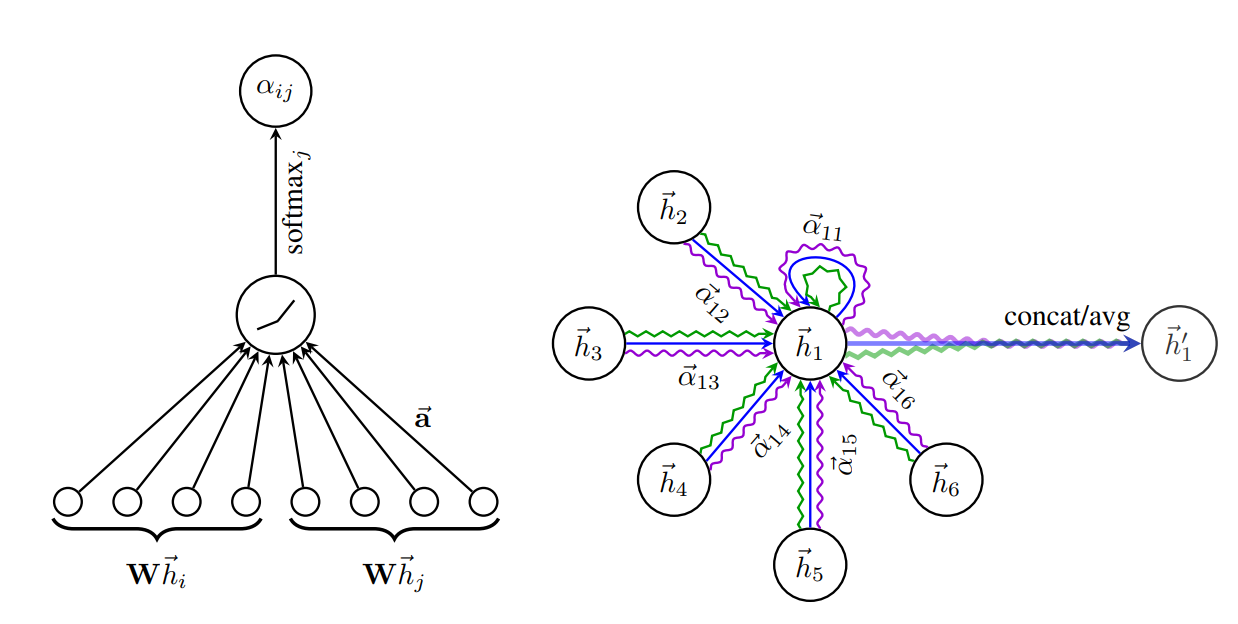

注意力系数的计算公式：
$\alpha_{ij}=\frac{\exp\left(\text{LeakyReLU}\left(\vec{\mathbf{a}}^T[\mathbf{W}\vec{h}_i\|\mathbf{W}\vec{h}_j]\right)\right)}{\sum_{k\in\mathcal{N}_i}\exp\left(\text{LeakyReLU}\left(\vec{\mathbf{a}}^T[\mathbf{W}\vec{h}_i\|\mathbf{W}\vec{h}_k]\right)\right)}$

模型最终输出的计算公式：
$\vec{h}_i^{\prime}=\sigma\left(\frac1K\sum_{k=1}^K\sum_{j\in\mathcal{N}_i}\alpha_{ij}^k\mathbf{W}^k\vec{h}_j\right)$


In [5]:
class Gat_Layer(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(Gat_Layer, self).__init__()
        self.in_dim = in_dim # 输入维度
        self.out_dim = out_dim # 输出维度
        # 定义网络层参数并初始化
        self.W = nn.Parameter(torch.zeros(size=(in_dim, out_dim))) #权重矩阵W,大小是F*F'
        self.alfa = nn.Parameter(torch.zeros(size=(2*out_dim, 1))) #权重向量alfa,形状是2F'*1

        nn.init.xavier_uniform_(self.W.data, gain=1.414)
        nn.init.xavier_uniform_(self.alfa.data, gain=1.414)

        # 定义LeakyRelu激活函数
        self.leakyrelu = nn.LeakyReLU(0.2)

    # 前向传播函数，在使用model(dataset, neighbours)时会自动调用forward函数
    # nodes中存储了所有节点的特征，adj是邻接矩阵
    def forward(self, nodes, adj):
        # 1. 初始化a[i][j]，这个数组中的每个元素代表了节点j对于节点i的重要性,前提是节点j是节点i的邻居
        a = torch.zeros((N, N))
        # 2. 根据公式计算a[i][j]
        # 首先找出节点i的邻居节点
        for i in range(N):
            for j in range(N):
                if adj[i][j] == 1:
                    a[i][j] = torch.dot(torch.cat((torch.matmul(self.W, nodes[i]), torch.matmul(self.W, nodes[j])), 0), self.alfa.T) # 参数0表示按行拼接，拼接后的大小是2F'*1
                    a[i][j] = self.leakyrelu(a[i][j])  # 使用LeakyRelu激活函数
                    # 最后用softmax函数进行归一化
                    a[i][j] = Func.softmax(a[i][j], dim=1)
        print('矩阵a:', a)
        
    # 根据公式计算h TODO：这里计算的还有一点问题，需要加上多头注意力机制中的K继续计算。
        h = torch.zeros((N, self.out_dim))
        for i in range(N):
            for j in range(N):
                if adj[i][j] == 1:
                    h[i] += a[i][j] * nodes[j] * self.W
        # 根据论文中给出的用avg来计算h'
        h_prime = sum(h)
        h_prime = h_prime / N
        h_prime = Func.sigmoid(h_prime)
        return h_prime

# 四、模型训练与测试

In [6]:
# 创建模型
# 多头注意力机制，这里设置头数为3
K = 3
model = Gat_Layer(F, K*F)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 创建DataLoader
data = TensorDataset(features, adj_matrix, labels)
dataloader = DataLoader(data, batch_size=1, shuffle=True)

# 训练模型
for epoch in range(100):
    for features, adjacency, labels in dataloader:
        h_prime = model(features, adjacency)
        loss = Func.cross_entropy(h_prime, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('epoch:', epoch, 'loss:', loss.item())

RuntimeError: size mismatch, got input (1433), mat (1433x4299), vec (1433)